In [1]:
# Install required libraries (if needed)
!pip install lightgbm ctgan -q

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.9 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [9]:
# Load original and synthetic datasets
original_data_path = '/content/fetal_health.csv'  # Update the path
synthetic_data_path = '/content/111balanced_fetal_health_dataset.csv'  # Update the path

original_data = pd.read_csv(original_data_path)
synthetic_data = pd.read_csv(synthetic_data_path)

# Display basic information about the datasets
print("Original Dataset Shape:", original_data.shape)
print("Synthetic Dataset Shape:", synthetic_data.shape)
print("\nOriginal Dataset Head:")
print(original_data.head())
print("\nSynthetic Dataset Head:")
print(synthetic_data.head())


Original Dataset Shape: (2126, 22)
Synthetic Dataset Shape: (4494, 22)

Original Dataset Head:
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_sho

In [10]:
# Separate features and target variable
target_column = 'fetal_health'  # Update if the column name differs
X_original = original_data.drop(columns=[target_column])
y_original = original_data[target_column]

X_synthetic = synthetic_data.drop(columns=[target_column])
y_synthetic = synthetic_data[target_column]

# Standardize features
scaler = StandardScaler()
X_original_scaled = scaler.fit_transform(X_original)
X_synthetic_scaled = scaler.transform(X_synthetic)


In [11]:
# Split datasets into training and testing sets
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(
    X_original_scaled, y_original, test_size=0.2, random_state=42, stratify=y_original)

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
    X_synthetic_scaled, y_synthetic, test_size=0.2, random_state=42, stratify=y_synthetic)


In [12]:
# Train Random Forest on Original Data
rf_orig = RandomForestClassifier(random_state=42)
rf_orig.fit(X_orig_train, y_orig_train)
y_rf_orig_pred = rf_orig.predict(X_orig_test)

# Train LightGBM on Original Data
lgbm_orig = LGBMClassifier(random_state=42)
lgbm_orig.fit(X_orig_train, y_orig_train)
y_lgbm_orig_pred = lgbm_orig.predict(X_orig_test)

# Evaluate Original Data Models
print("Random Forest - Original Data")
print(classification_report(y_orig_test, y_rf_orig_pred))

print("LightGBM - Original Data")
print(classification_report(y_orig_test, y_lgbm_orig_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score -0.250726
[LightGBM] [Info] Start training from score -1.974552
[LightGBM] [Info] Start training from score -2.489624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Random Forest - Original Data
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       332
         2.0       0.85      0.68      0.75        59
         3.0       0.86      0.86      0.86        35

    accuracy                           0.93       426
   macro avg       0.88      0.84 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [13]:
# Train Random Forest on Synthetic Data
rf_syn = RandomForestClassifier(random_state=42)
rf_syn.fit(X_syn_train, y_syn_train)
y_rf_syn_pred = rf_syn.predict(X_syn_test)

# Train LightGBM on Synthetic Data
lgbm_syn = LGBMClassifier(random_state=42)
lgbm_syn.fit(X_syn_train, y_syn_train)
y_lgbm_syn_pred = lgbm_syn.predict(X_syn_test)

# Evaluate Synthetic Data Models
print("Random Forest - Synthetic Data")
print(classification_report(y_syn_test, y_rf_syn_pred))

print("LightGBM - Synthetic Data")
print(classification_report(y_syn_test, y_lgbm_syn_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 3595, number of used features: 21
[LightGBM] [Info] Start training from score -0.998887
[LightGBM] [Info] Start training from score -1.195203
[LightGBM] [Info] Start training from score -1.111490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


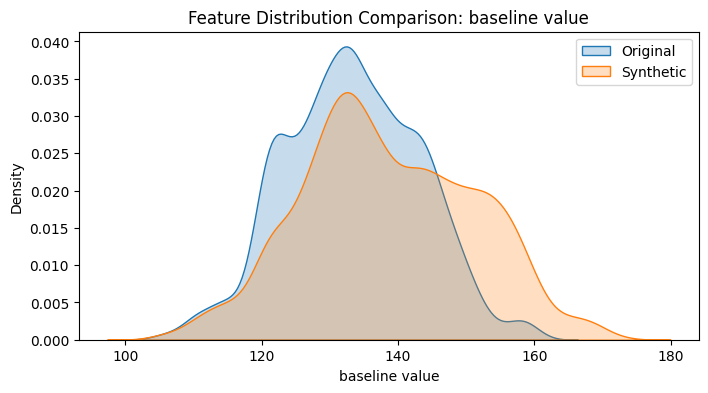

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


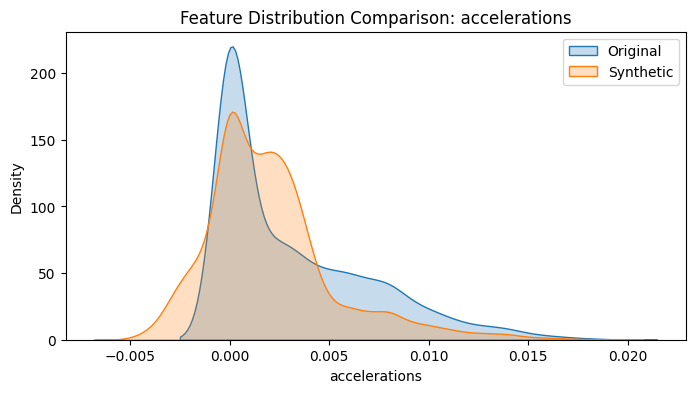

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


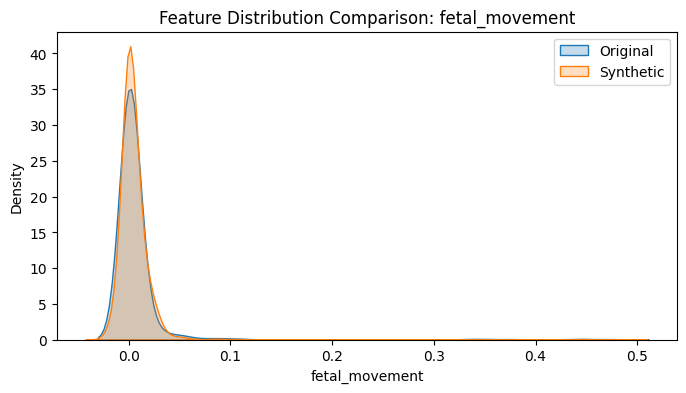

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


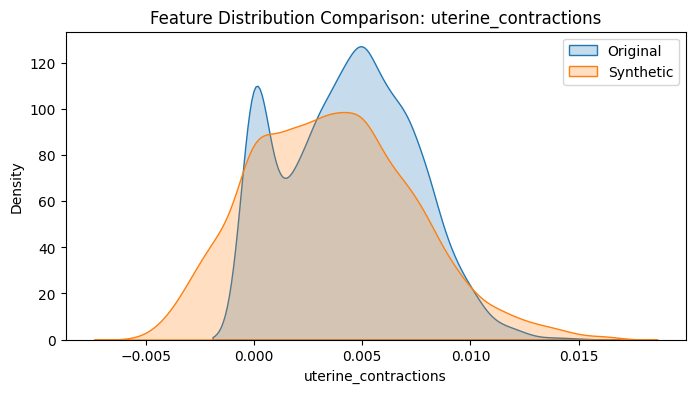

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


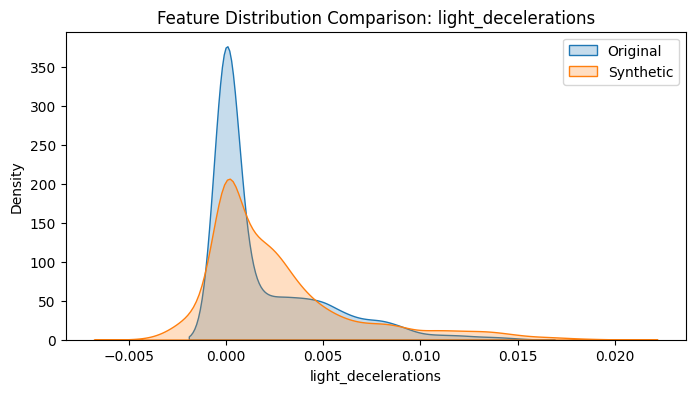

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


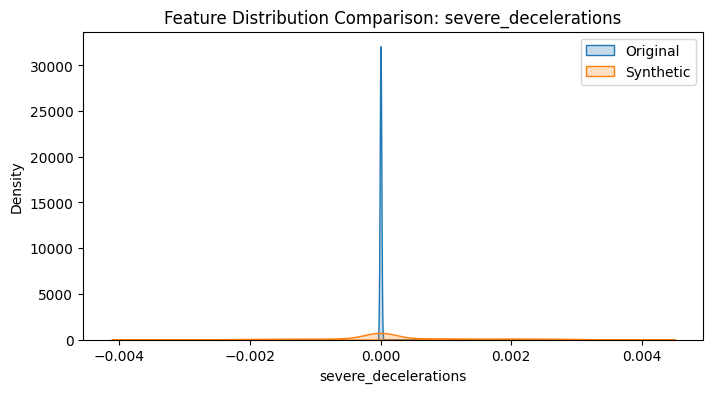

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


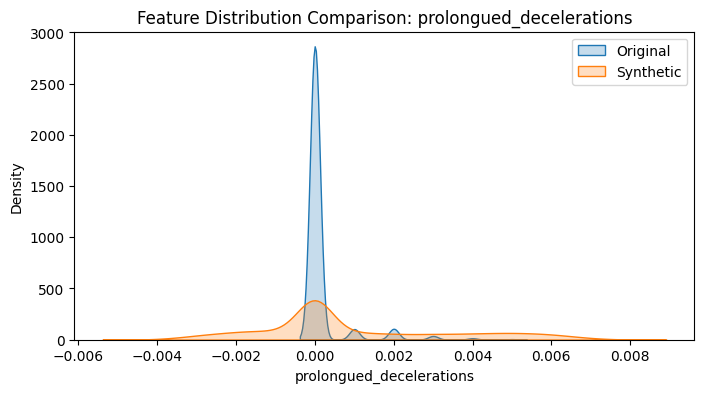

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


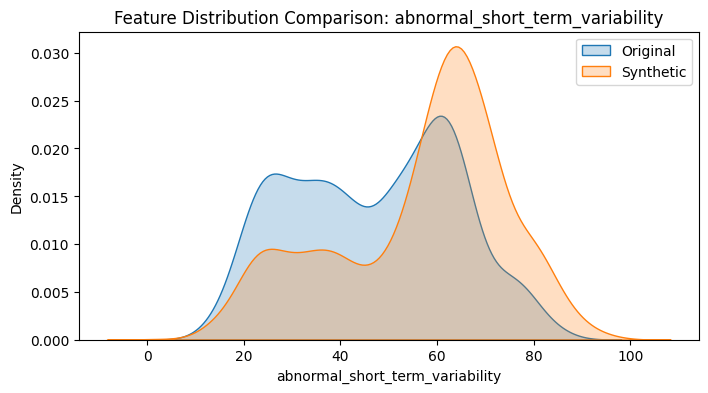

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


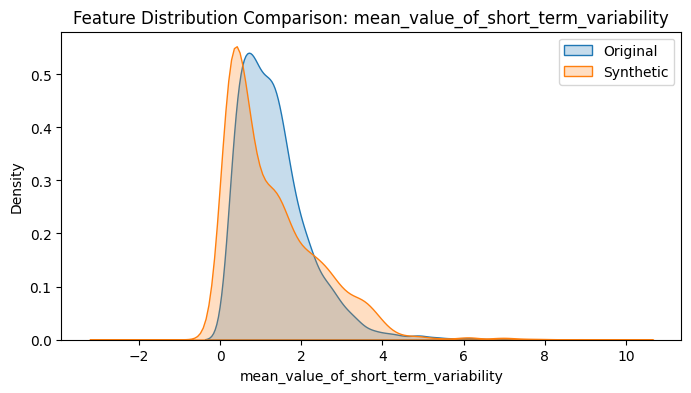

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


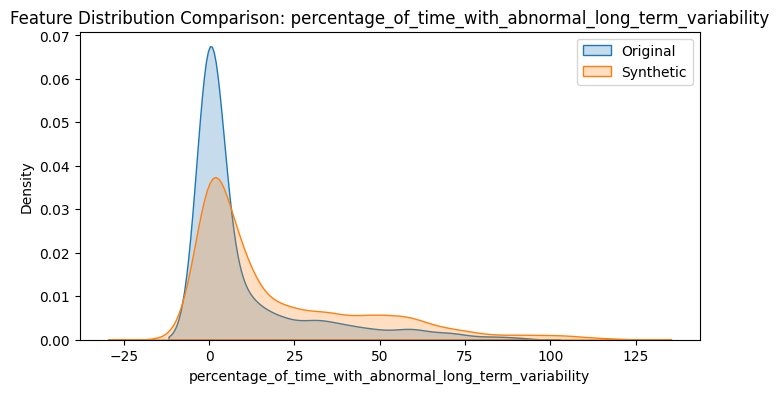

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


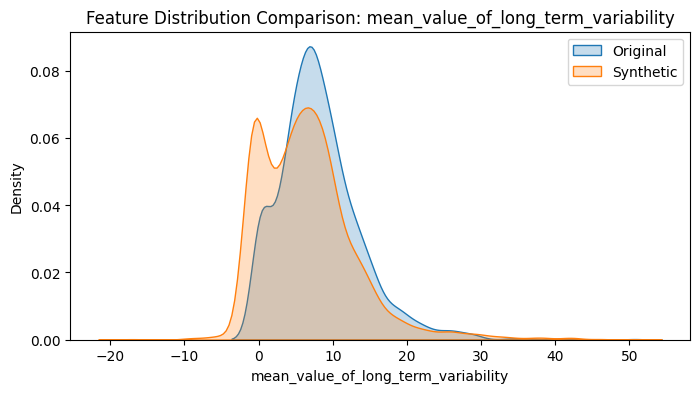

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


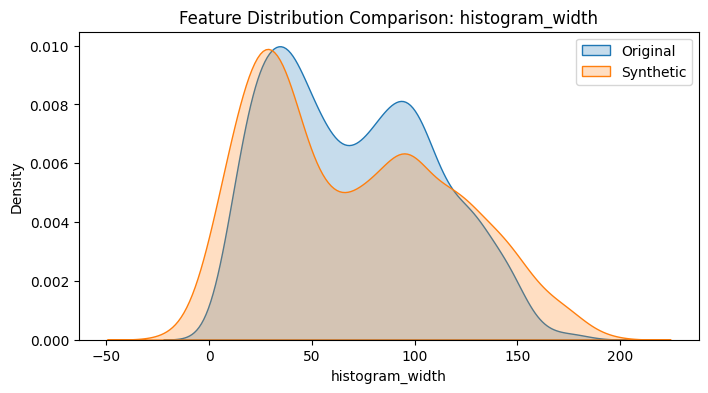

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


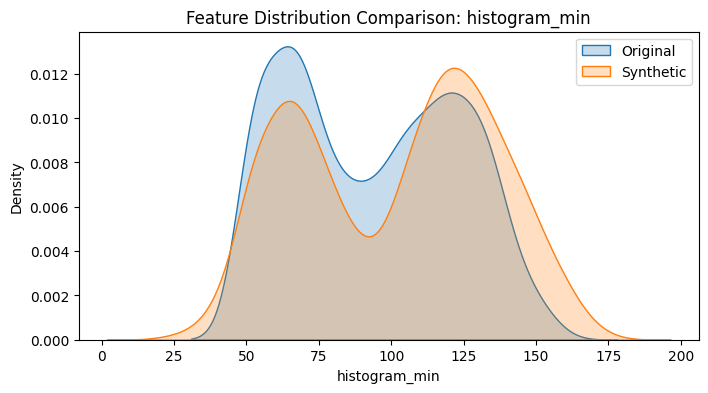

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


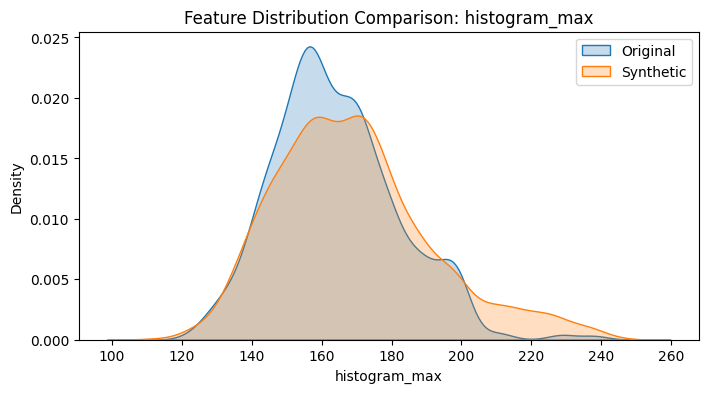

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


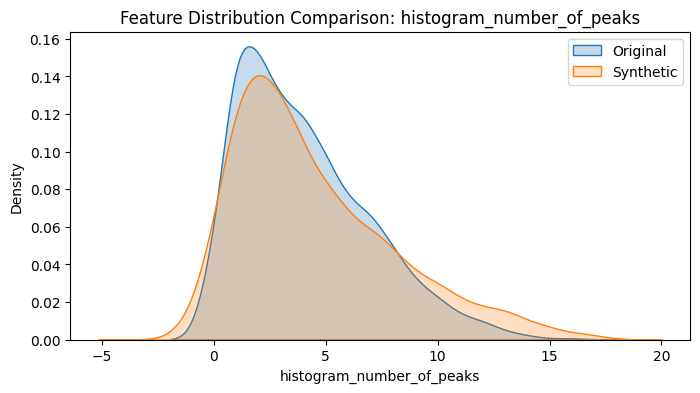

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


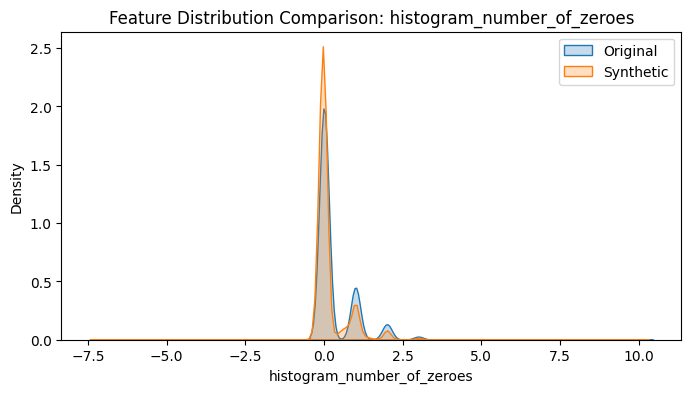

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


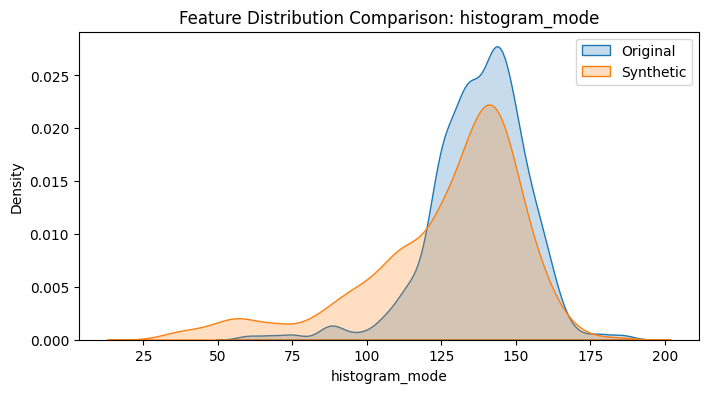

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


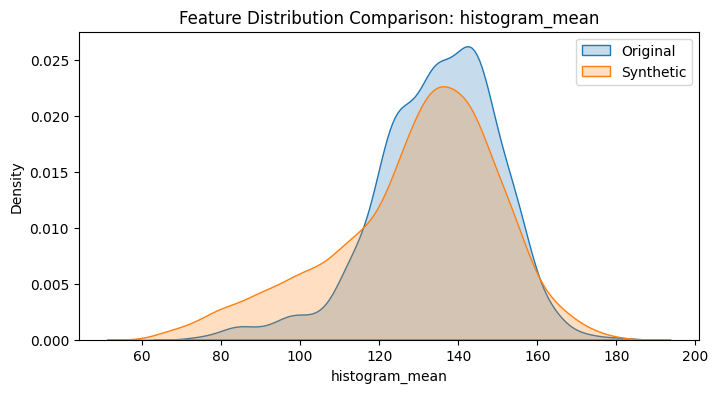

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


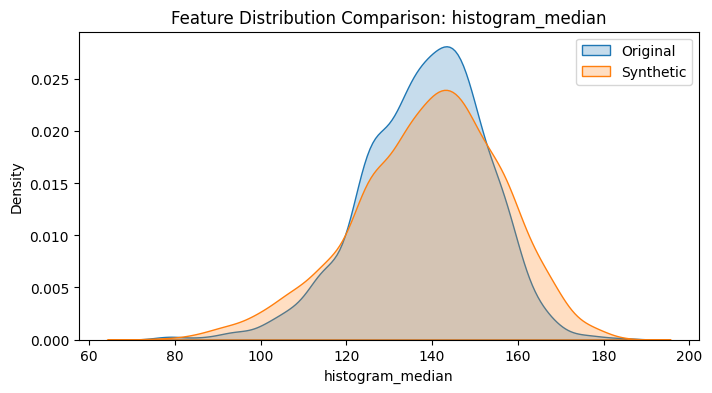

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


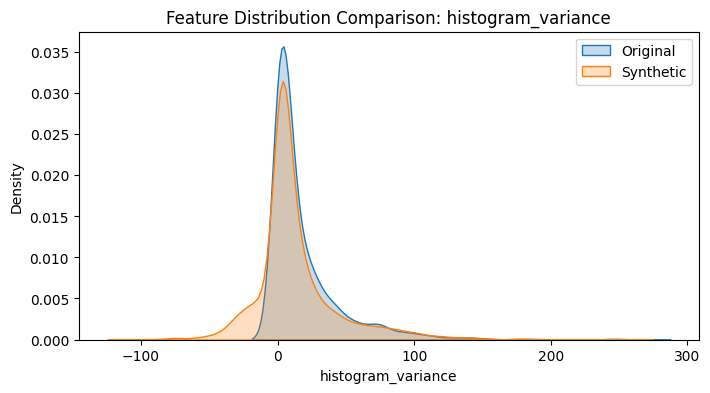

<ipython-input-14-5e00014ad259>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[feature], label="Original", shade=True)
<ipython-input-14-5e00014ad259>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)


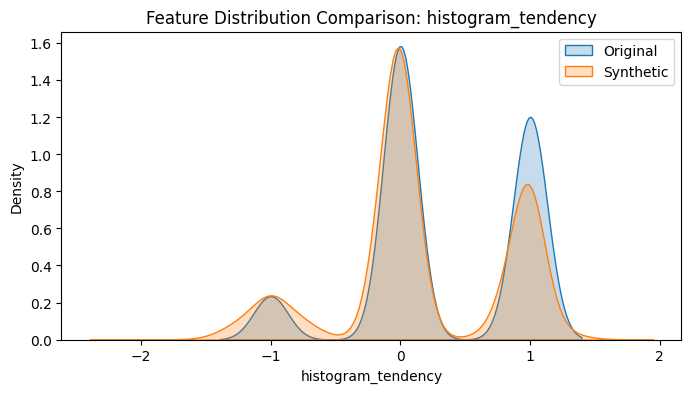

In [14]:
# Compare distributions for all features
for feature in X_original.columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(original_data[feature], label="Original", shade=True)
    sns.kdeplot(synthetic_data[feature], label="Synthetic", shade=True)
    plt.title(f"Feature Distribution Comparison: {feature}")
    plt.legend()
    plt.show()
